In [3]:
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as pl

In [16]:
# read all confirmed planets from the exoplanet archive
targets = Table.read('../targets.txt', format='ascii', comment='#')

In [18]:
transit_time = np.array([targets['pl_tranmid'] + i*targets['pl_orbper'] for i in range(100)]).T
from astropy.time import Time

def tobjd(time):
    return Time(time, format='isot', scale='utc').jd

import matplotlib.dates as dates
plot_date = lambda jd: dates.datestr2num([(Time(jd, format='jd').iso)[:10] for jd in jd])

In [26]:
stname = 'Kepler-22'
plname = 'Kepler-22 b'
vis = np.loadtxt('../../visibility/jwst_gtvt/{0}.dat'.format(stname), skiprows=19, converters={0: tobjd})
windows = np.loadtxt(open('../../visibility/jwst_gtvt/{0}.dat'.format(stname)).readlines()[9:13], converters={0: tobjd, 1: tobjd})
breaks = [np.where(np.isclose(vis[:, 0], windows[:,1][i], rtol=1e-12))[0][0] for i in range(len(windows))]
breaks = np.insert(breaks, 0, 0)

max uncertainty: 6.1872 hours


<ipython-input-45-58f59be6b428>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  pl.gca().set_yticklabels(pl.yticks()[0], fontsize=15)
<ipython-input-45-58f59be6b428>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  pl.gca().set_xticklabels(x_ticks_labels, rotation=45, fontsize=15, ha='right');


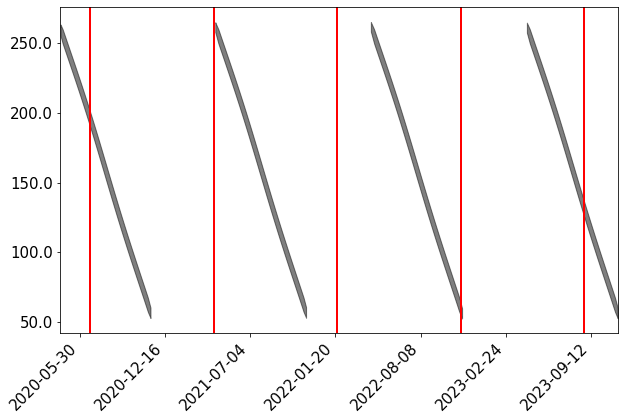

In [45]:
i = np.where(targets['pl_name'] == plname)[0][0]

print("max uncertainty: {0} hours".format(100*2*24*targets['pl_orbpererr1'][i]))

pl.figure(figsize=(10, 6))
for j in range(len(transit_time)):
    pl.axvline(transit_time[i][j], color='r', linewidth=2)
[pl.fill_between(vis[:, 0][breaks[i]+1:breaks[i+1]], 
                 vis[:, 1][breaks[i]+1:breaks[i+1]], 
                 vis[:, 2][breaks[i]+1:breaks[i+1]], 
                 color='k', alpha=0.5) 
 for i in range(len(breaks)-1)]
pl.xlim(vis[0, 0], vis[-1, 0])
x_ticks_labels = [t[:10] for t in Time(pl.xticks()[0], format='jd').iso]
pl.gca().set_yticklabels(pl.yticks()[0], fontsize=15)
pl.gca().set_xticklabels(x_ticks_labels, rotation=45, fontsize=15, ha='right');
pl.savefig('visibility_{0}.png'.format(plname))